In [4]:
import pandas as pd
from sklearn.metrics import pairwise_distances

job_data = pd.read_csv(r"C:\Users\abdul\Downloads\archive (5)\postings.csv")

job_skills = {}

for idx, row in job_data.iterrows():
    title = row['title']
    skills = str(row['skills_desc']).split(',')  
    if title not in job_skills:
        job_skills[title] = {}
    for skill in skills:
        skill = skill.strip()  
        if skill not in job_skills[title]:
            job_skills[title][skill] = 0
        job_skills[title][skill] += 1  


job_skills_df = pd.DataFrame.from_dict(job_skills, orient='index').fillna(0)
print(job_skills_df.head())  

query_job_titles = ['Data Scientist', 'Software Engineer', 'Product Manager']

for query_job_title in query_job_titles:
    if query_job_title in job_skills_df.index:
        query_job = job_skills_df.loc[query_job_title].values.reshape(1, -1)

        euclidean_distances = pairwise_distances(query_job, job_skills_df, metric='euclidean')[0]
        
        euclidean_top_indices = euclidean_distances.argsort()[:10]

        print(f"\nTop 10 job titles similar to '{query_job_title}':")
        for i in euclidean_top_indices:
            print(f"{job_skills_df.index[i]}: {euclidean_distances[i]}")
    else:
        print(f"'{query_job_title}' not found in the dataset.")


                                                 Requirements: \n\nWe are seeking a College or Graduate Student (can also be completed with school) with a focus in Planning  \
Marketing Coordinator                                                                          1.0                                                                             
Solution Architect                                                                             0.0                                                                             
Governance and Controls Analyst Project Manager                                                0.0                                                                             
Mental Health Therapist/Counselor                                                              0.0                                                                             
 Service Technician                                                                            0.0                      

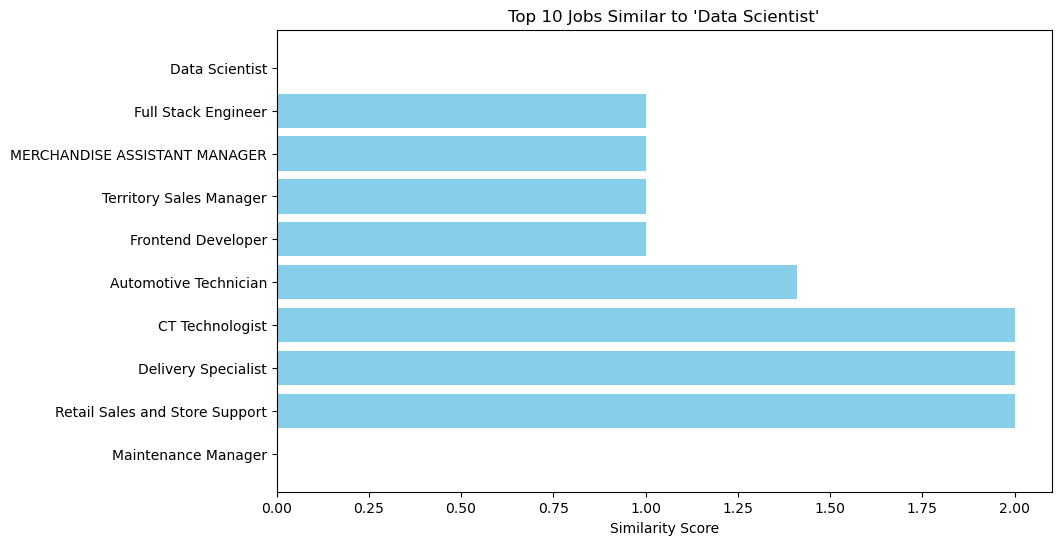

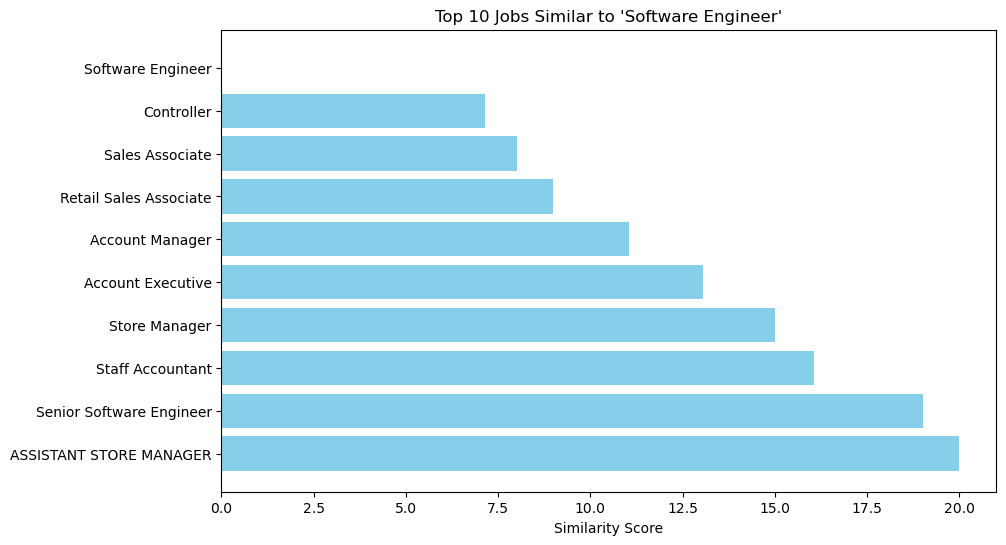

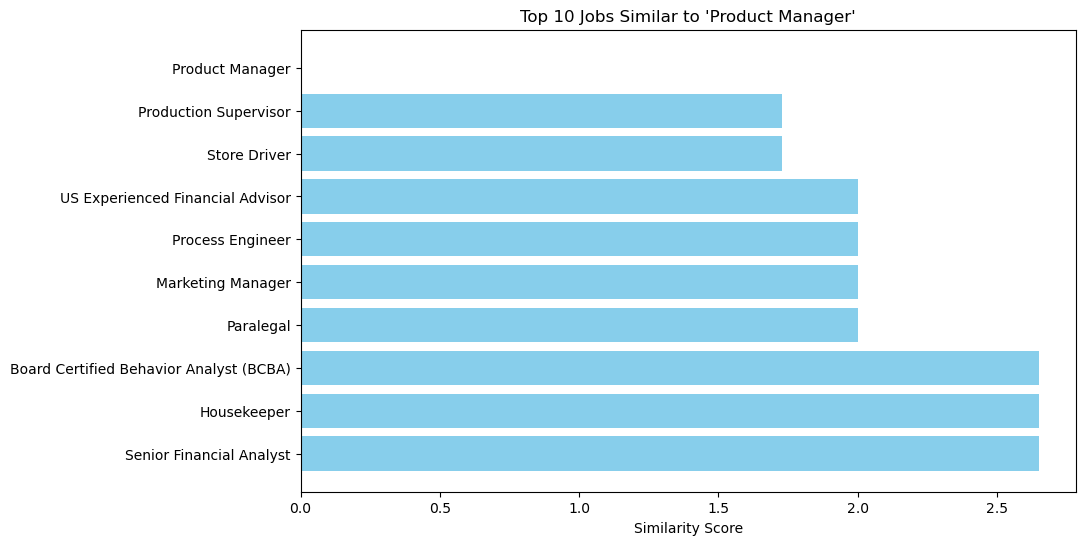

In [5]:
import matplotlib.pyplot as plt

data = {
    "Data Scientist": {
        "Job Titles": ["Data Scientist", "Full Stack Engineer", "MERCHANDISE ASSISTANT MANAGER", 
                       "Territory Sales Manager", "Frontend Developer", "Automotive Technician", 
                       "CT Technologist", "Delivery Specialist", "Retail Sales and Store Support", 
                       "Maintenance Manager"],
        "Similarity Scores": [0.0, 1.0, 1.0, 1.0, 1.0, 1.41, 2.0, 2.0, 2.0, 0.0]
    },
    "Software Engineer": {
        "Job Titles": ["Software Engineer", "Controller", "Sales Associate", "Retail Sales Associate", 
                       "Account Manager", "Account Executive", "Store Manager", "Staff Accountant", 
                       "Senior Software Engineer", "ASSISTANT STORE MANAGER"],
        "Similarity Scores": [0.0, 7.14, 8.0, 9.0, 11.05, 13.04, 15.0, 16.06, 19.0, 20.0]
    },
    "Product Manager": {
        "Job Titles": ["Product Manager", "Production Supervisor", "Store Driver", 
                       "US Experienced Financial Advisor", "Process Engineer", "Marketing Manager", 
                       "Paralegal", "Board Certified Behavior Analyst (BCBA)", "Housekeeper", 
                       "Senior Financial Analyst"],
        "Similarity Scores": [0.0, 1.73, 1.73, 2.0, 2.0, 2.0, 2.0, 2.65, 2.65, 2.65]
    }
}

def plot_similarity(query_title, data):
    job_titles = data[query_title]["Job Titles"]
    similarity_scores = data[query_title]["Similarity Scores"]

    plt.figure(figsize=(10, 6))
    plt.barh(job_titles, similarity_scores, color='skyblue')
    plt.xlabel("Similarity Score")
    plt.title(f"Top 10 Jobs Similar to '{query_title}'")
    plt.gca().invert_yaxis()  # Invert y-axis to show highest similarity at the top
    plt.show()

plot_similarity("Data Scientist", data)

plot_similarity("Software Engineer", data)

plot_similarity("Product Manager", data)
